In [1]:
#import the data

import os
import pandas as pd

path = r"C:\Users\Administrator\Documents\IPL Data"

os.chdir(path)

os.listdir(path)

ball = pd.read_excel("Ball_by_Ball.xlsx")

match = pd.read_excel("Match.xlsx")

player = pd.read_excel("Player.xlsx")

player_match = pd.read_excel('Player_Match.xlsx')

season = pd.read_excel('Season.xlsx')

team = pd.read_excel('Team.xlsx')

In [5]:
# We can create the two way crosstab using the groupby function

team_wise_win_type = match.groupby(['Match_Winner_Id','Win_Type']).size().reset_index() #values_count()

team_wise_win_type


#Converting the long data to wide data

Final_data = team_wise_win_type.pivot('Match_Winner_Id','Win_Type', 0)

Final_data
#Filling the missing values by 0
Final_data = Final_data.fillna(0)

Final_data

#Getting the total values
#Final_data['Total'] = Final_data['Tie']+Final_data['by runs']+Final_data['by wickets']
#Final_data

Win_Type,Tie,by runs,by wickets
Match_Winner_Id,,,
1.0,0.0,29.0,39.0
2.0,1.0,27.0,42.0
3.0,0.0,46.0,33.0
4.0,2.0,28.0,33.0
5.0,2.0,23.0,38.0
6.0,0.0,18.0,38.0
7.0,0.0,43.0,37.0
8.0,0.0,18.0,11.0
9.0,0.0,2.0,4.0


In [ ]:
#Multi dimensional table

In [11]:
#PS - Win type by each team in each season

#season_wise_team_wise = pd.crosstab(index=[match['Match_Winner_Id'],
                                            #match['Season_Id']],
                                     #columns=match['Win_Type'])           #.reset_index()

#season_wise_team_wise
season_wise_team_wise = pd.crosstab(index=match['Match_Winner_Id'],
                                    columns=[match['Season_Id'],
                                     match['Win_Type']])           

season_wise_team_wise

Season_Id             1              2                      3          \
Win_Type        by runs by wickets Tie by runs by wickets Tie by runs   
Match_Winner_Id                                                         
1.0                   4          2   0       1          2   0       4   
2.0                   2          2   0       3          6   0       1   
3.0                   5          4   0       6          2   0       5   
4.0                   5          5   0       3          4   1       0   
5.0                   4          9   1       2          3   0       4   
6.0                   2          5   0       3          7   0       4   
7.0                   2          5   0       4          1   0       8   
8.0                   0          2   0       5          4   0       5   
9.0                   0          0   0       0          0   0       0   
10.0                  0          0   0       0          0   0       0   
11.0                  0          0   0       0          0   0       0   
12.0                  0          0   0       0          0   0       0   
13.0                  0          0   0       0          0   0       0   

Season_Id                        4               ...           6             \
Win_Type        by wickets by runs by wickets    ...     by runs by wickets   
Match_Winner_Id                                  ...                          
1.0                      3       4          4    ...           2          4   
2.0                      7       3          7    ...           5          3   
3.0                      4       8          3    ...           7          5   
4.0                      3       4          3    ...           3          5   
5.0                      2       0          6    ...           3          8   
6.0                      3       2          2    ...           1          2   
7.0                      3       5          5    ...           9          4   
8.0                      3       5          1    ...           0          0   
9.0                      0       2          4    ...           0          0   
10.0                     0       0          4    ...           3          1   
11.0                     0       0          0    ...           4          5   
12.0                     0       0          0    ...           0          0   
13.0                     0       0          0    ...           0          0   

Season_Id         7                      8                          9  \
Win_Type        Tie by runs by wickets Tie by runs by wickets by runs   
Match_Winner_Id                                                         
1.0               0       4          7   0       2          5       2   
2.0               0       1          4   0       3          5       5   
3.0               0       3          7   0       7          3       0   
4.0               0       6          6   1       2          0       2   
5.0               1       2          4   0       3          4       0   
6.0               0       0          2   0       2          3       2   
7.0               0       3          4   0       7          3       2   
8.0               0       0          0   0       0          0       0   
9.0               0       0          0   0       0          0       0   
10.0              0       0          0   0       0          0       0   
11.0              0       3          3   0       6          1       5   
12.0              0       0          0   0       0          0       2   
13.0              0       0          0   0       0          0       1   

Season_Id                   
Win_Type        by wickets  
Match_Winner_Id             
1.0                      6  
2.0                      4  
3.0                      0  
4.0                      2  
5.0                      0  
6.0                      5  
7.0                      5  
8.0                      0  
9.0                      0  
10.0                     0  
11.0                

* Which team in IPL History has the highest average match aggregate

* Create a table containing the team_name scoring maximum runs - season wise

# PS: Which team in IPL History has the highest average match aggregate

In [23]:
# Total Matches

Total_match_at_home = pd.crosstab(index=match['Team_Name_Id'], columns='Home_Match').reset_index()

Total_match_at_home

Total_match_away = pd.crosstab(index=match['Opponent_Team_Id'], columns='Away_Match').reset_index()

Total_match_away

Total_match = pd.merge(Total_match_at_home, Total_match_away, left_on='Team_Name_Id',
                      right_on='Opponent_Team_Id')
Total_match

#Adding a columns of Total match

Total_match['Total'] = Total_match['Home_Match']+Total_match['Away_Match']

Total_match
                       
#Selecting only the column with Team Name ID and total

Total_match = Total_match[['Team_Name_Id','Total']]
                       
Total_match 


col_0,Team_Name_Id,Total
0,1,132
1,2,139
2,3,131
3,4,134
4,5,118
5,6,133
6,7,140
7,8,75
8,9,14
9,10,46


In [25]:
#Team Wise Total Runs
Total_runs = ball.groupby(['Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()
Total_runs

,Team_Batting_Id,Batsman_Scored
0,1,18209
1,2,20464
2,3,19940
3,4,19720
4,5,16658
5,6,18532
6,7,20662
7,8,10881
8,9,1758
9,10,6040


In [30]:
#Merging the table of runs and matches

PS1_final = pd.merge(Total_match,Total_runs, left_on='Team_Name_Id',
                    right_on='Team_Batting_Id')
PS1_final = PS1_final[['Team_Name_Id','Batsman_Scored','Total']]

#Calculating the average 

PS1_final['Avg.Agg'] = round((PS1_final['Batsman_Scored']/PS1_final['Total']),2)

PS1_final.sort_values(by = "Avg.Agg", ascending = False).head(1)

,Team_Name_Id,Batsman_Scored,Total,Avg.Agg
2,3,19940,131,152.21


# PS: Create a table containing the team_name scoring maximum runs - season wise

In [33]:
T = ball.groupby(['Season_Id','Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()
T

,Season_Id,Team_Batting_Id,Batsman_Scored
0,1,1,1795
1,1,2,1865
2,1,3,2365
3,1,4,2340
4,1,5,2420
5,1,6,2000
6,1,7,1896
7,1,8,2117
8,2,1,1587
9,2,2,2166


In [45]:
#pick max value of runs for each season

#PS2_Final_data = T.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending=False).reset_index()



T2['Rank'] = T.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending=False)
T2

#Filtering the rank value by 1
#PS2_Final_Data = T2[(T2.Rank == 1)]
#PS2_Final_Data

,Season_Id,Team_Batting_Id,Batsman_Scored,Rank
0,1,1,1795,8.0
1,1,2,1865,7.0
2,1,3,2365,2.0
3,1,4,2340,3.0
4,1,5,2420,1.0
5,1,6,2000,5.0
6,1,7,1896,6.0
7,1,8,2117,4.0
8,2,1,1587,7.0
9,2,2,2166,3.0


In [53]:
#Univariant analysis
#PS1 - Does batting first, helps you to score more runs?






Runs_by_innings = ball.groupby(['Innings_Id'])['Batsman_Scored'].sum().reset_index()
T3


,Innings_Id,Batsman_Scored
0,1,86811
1,2,78989
2,3,80
3,4,70


In [49]:
T4 = pd.DataFrame(T3.loc[1]+T3.loc[2]).T
T4

,Innings_Id,Batsman_Scored
0,5,79069


In [54]:
First_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 1)|
                                     (Runs_by_innings['Innings_Id']==3)]['Batsman_Scored'].sum()

Second_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 2)|
                                     (Runs_by_innings['Innings_Id']==4)]['Batsman_Scored'].sum()
First_Inning_runs

86891

In [56]:
#Creating the list of two columns

Inning = ['First Inning','Second Inning']
Runs = [First_Inning_runs, Second_Inning_runs]
df=pd.DataFrame(list(zip(Inning, Runs)), columns=['Inning','Runs'])
df

,Inning,Runs
0,First Inning,86891
1,Second Inning,79059


In [67]:
from matplotlib import pyplot as plt

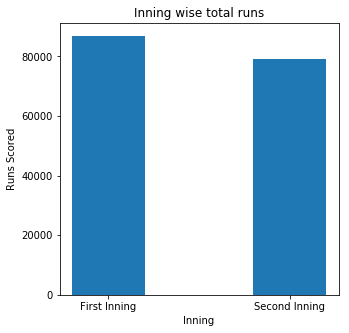

In [80]:
plt.rcParams['figure.figsize'] = [5,5]
plt.bar(df['Inning'],df['Runs'], width=0.4) #barh, height = 0.6
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')


plt.show()

In [ ]:

#PS2 - Top 10 batsman based on runs

#PS3 - Top 10 bowler based on extra runs

#PS4 - Top 3 batsman based on centuries

#PS5 - Are right handed batsman dominating IPL?

In [86]:
Top_batsman = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
Top_batsman = Top_batsman.sort_values(by = 'Batsman_Scored', ascending = False)
Top_batsman.head(10)

,Striker_Id,Batsman_Scored
20,21,4106
7,8,4105
56,57,3874
39,40,3634
161,162,3447
45,46,3390
186,187,3373
109,110,3270
19,20,3270
41,42,3082


In [ ]:
player_name = pd.crosstab(index = player['Player_Id', columns = player['Player_Name'])


In [91]:
#final_data = pd.merge(Top_batsman, player[['Player_Id','Player_Name']], left_on = Top_batsman['Striker_Id'],
                     #right_on = player['Player_Id'])
#final_data = final_data[['Player_Id','Player_Name','Batsman_Scored']]
#final_data

,Player_Id,Player_Name,Batsman_Scored
0,21,SK Raina,4106
1,8,V Kohli,4105
2,57,RG Sharma,3874
3,40,G Gambhir,3634
4,162,CH Gayle,3447
5,46,RV Uthappa,3390
6,187,DA Warner,3373
7,110,AB de Villiers,3270
8,20,MS Dhoni,3270
9,42,S Dhawan,3082


In [92]:
(ball['Extra_Runs'] == 1).sum()

5527

In [94]:
Score=ball.groupby(['Season_Id','Striker_Id','Match_Id'])['Batsman_Scored'].sum().reset_index()
Score

,Season_Id,Striker_Id,Match_Id,Batsman_Scored
0,1,1,335987,10
1,1,1,335991,14
2,1,1,335998,12
3,1,1,336002,4
4,1,1,336005,51
5,1,1,336008,5
6,1,1,336015,20
7,1,1,336019,91
8,1,1,336022,7
9,1,1,336026,15


In [95]:
ball.head()

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,


In [97]:
Score=Score[Score['Batsman_Scored']>99]
Score

,Season_Id,Striker_Id,Match_Id,Batsman_Scored
13,1,2,335987,158
149,1,19,335988,116
376,1,44,336023,114
435,1,53,335999,109
464,1,56,335995,117
692,1,100,336024,115
1428,2,96,392241,114
1477,2,110,392194,105
1940,3,31,419112,100
2124,3,64,419144,110


In [99]:
Player_score=pd.merge(Score,player[['Player_Id','Player_Name']],left_on='Striker_Id',right_on='Player_Id')
Player_score

,Season_Id,Striker_Id,Match_Id,Batsman_Scored,Player_Id,Player_Name
0,1,2,335987,158,2,BB McCullum
1,8,2,829716,100,2,BB McCullum
2,1,19,335988,116,19,MEK Hussey
3,1,44,336023,114,44,ST Jayasuriya
4,1,53,335999,109,53,AC Gilchrist
5,4,53,501265,106,53,AC Gilchrist
6,1,56,335995,117,56,A Symonds
7,1,100,336024,115,100,SE Marsh
8,2,96,392241,114,96,MK Pandey
9,2,110,392194,105,110,AB de Villiers


In [100]:
Final_Centuries=pd.crosstab(index=Player_score['Player_Name'],columns='Centuries').reset_index()

In [102]:
Final_Centuries=Final_Centuries.sort_values(by='Centuries',ascending=False)

In [103]:
Final_Centuries.head(3)

col_0,Player_Name,Centuries
5,CH Gayle,5
23,V Kohli,4
1,AB de Villiers,3


In [47]:
ball.dtypes

Match_Id                     int64
Season_Id                    int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored               int64
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [ ]:
#list(match)